# Data-Driven Customer Retention: Understanding Why Subscribers Leave

## I. Introduction & Business Context
+ What is churn and why it matters? 
    - Churn is the rate at which customers stop using a service, and it matters because high churn directly reduces revenue, increases acquisition costs, and signals issues with customer satisfaction and loyalty.
+ Business Questions:
    1. Which customer segments have the highest churn rates?
    2. What are the key drivers of churn?
    3. What is the estimated revenue loss from churn, and which groups contribute most to it?

## II. Data Loading & Cleaning

In [1]:
# Import Libraries and version check

import numpy as np
print(np.__version__)

import pandas as pd
print(pd.__version__)

2.3.2
2.3.2


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sub_data = pd.read_csv("sub_data.csv") 

In [4]:
sub_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251100 entries, 0 to 251099
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                248637 non-null  float64
 1   MonthlyCharges            248634 non-null  float64
 2   TotalCharges              248626 non-null  float64
 3   SubscriptionType          248640 non-null  object 
 4   PaymentMethod             248538 non-null  object 
 5   PaperlessBilling          248661 non-null  object 
 6   ContentType               248618 non-null  object 
 7   MultiDeviceAccess         248639 non-null  object 
 8   DeviceRegistered          248576 non-null  object 
 9   ViewingHoursPerWeek       248559 non-null  float64
 10  AverageViewingDuration    248627 non-null  float64
 11  ContentDownloadsPerMonth  248640 non-null  float64
 12  GenrePreference           248625 non-null  object 
 13  UserRating                248618 non-null  f

In [5]:
sub_data.shape

(251100, 21)

In [6]:
sub_data.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'CustomerID', 'Churn'],
      dtype='object')

In [7]:
sub_data.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20.0,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,NaN,Sci-Fi,2.176498,4.0,Male,3.0,No,No,CB6SXPNVZA,0.0
1,57.0,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18.0,Action,3.478632,8.0,Male,23.0,No,Yes,S7R2G87O09,0.0
2,73.0,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23.0,Fantasy,4.238824,6.0,Male,1.0,Yes,Yes,EASDC20BDT,0.0
3,32.0,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30.0,Drama,4.276013,2.0,Male,24.0,Yes,Yes,NPF69NT69N,0.0
4,57.0,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20.0,Comedy,3.616170,4.0,Female,0.0,No,No,4LGYPK7VOL,0.0


In [8]:
# checking total Missing values/ NaN
sub_data.isna().sum()

AccountAge                  2463
MonthlyCharges              2466
TotalCharges                2474
SubscriptionType            2460
PaymentMethod               2562
PaperlessBilling            2439
ContentType                 2482
MultiDeviceAccess           2461
DeviceRegistered            2524
ViewingHoursPerWeek         2541
AverageViewingDuration      2473
ContentDownloadsPerMonth    2460
GenrePreference             2475
UserRating                  2482
SupportTicketsPerMonth      2528
Gender                      2429
WatchlistSize               2576
ParentalControl             2508
SubtitlesEnabled            2531
CustomerID                  2499
Churn                       2545
dtype: int64

In [9]:
# drop Missing values/ NaN
# dropped_data = sub_data.dropna()

In [10]:
sub_data.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,248637.000000,248634.000000,248626.000000,248559.000000,248627.000000,248640.000000,248618.000000,248572.000000,248524.000000,248555.000000
mean,60.063317,12.490766,750.507661,20.502385,92.252468,24.489069,3.002475,4.503033,12.021080,0.181340
std,34.289984,4.328869,523.178282,11.244575,50.509919,14.424188,1.154777,2.871917,7.193161,0.385301
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.735067,328.910663,10.764442,48.348516,12.000000,2.001650,2.000000,6.000000,0.000000
50%,60.000000,12.495235,649.499563,20.525296,92.263135,24.000000,3.001927,4.000000,12.000000,0.000000
75%,90.000000,16.240367,1089.054791,30.215893,135.897747,37.000000,4.001460,7.000000,18.000000,0.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000


In [11]:
# Detecting duplicates
sub_data.duplicated().sum()

np.int64(4285)

In [12]:
# Removing duplicates
sub_data1 = sub_data.drop_duplicates()

In [13]:
# sub_data1.shape
sub_data1.duplicated().sum()

np.int64(0)

Filling in the missing values in Numerical Columns:
AccountAge, MonthlyCharges, TotalCharges,
ViewingHoursPerWeek, AverageViewingDuration, ContentDownloadsPerMonth,
UserRating, SupportTicketsPerMonth, WatchlistSize

But first, check each columns' distribution, if symmetric then use the mean, otherwise use the median.

In [14]:
# AccountAge
print("Skewness:", sub_data1["AccountAge"].skew())
print("25th, 50th, 75th quantiles:", sub_data1["AccountAge"].quantile([0.25, 0.5, 0.75]))

# Skewness: -0.0023 = very slightly negatively skewed/symmetrical - use the mean for imputation

Skewness: -0.002348533786624772
25th, 50th, 75th quantiles: 0.25    30.0
0.50    60.0
0.75    90.0
Name: AccountAge, dtype: float64


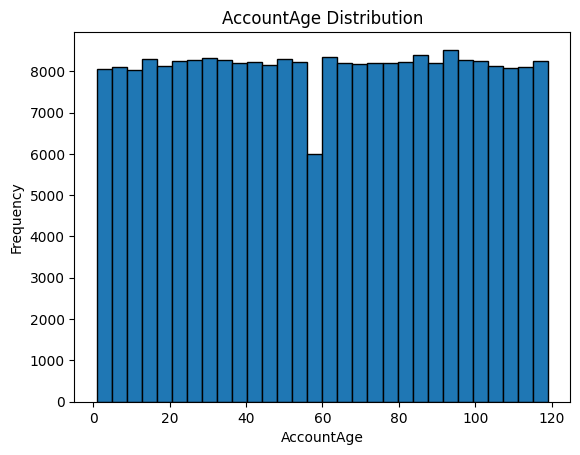

In [15]:
# Histogram - Account Age Distribution
plt.hist(sub_data1["AccountAge"], bins=30, edgecolor="black")
plt.title("AccountAge Distribution")
plt.xlabel("AccountAge")
plt.ylabel("Frequency")
plt.show()

In [16]:
# MonthlyCharges
print("Skewness:", sub_data1["MonthlyCharges"].skew())
print("25th, 50th, 75th quantiles:", sub_data1["MonthlyCharges"].quantile([0.25, 0.5, 0.75]))

# Skewness: -0.0034 = very slightly negatively skewed/symmetrical - use the mean for imputation

Skewness: -0.003454731301807267
25th, 50th, 75th quantiles: 0.25     8.738458
0.50    12.493567
0.75    16.240085
Name: MonthlyCharges, dtype: float64


In [17]:
# TotalCharges
print("Skewness:", sub_data1["TotalCharges"].skew())
print("25th, 50th, 75th quantiles:", sub_data1["TotalCharges"].quantile([0.25, 0.5, 0.75]))

# Skewness: 0.6944710325730349 = moderately positively skewed - use the median for imputation

Skewness: 0.6944710325730349
25th, 50th, 75th quantiles: 0.25     329.132752
0.50     649.728203
0.75    1089.250010
Name: TotalCharges, dtype: float64


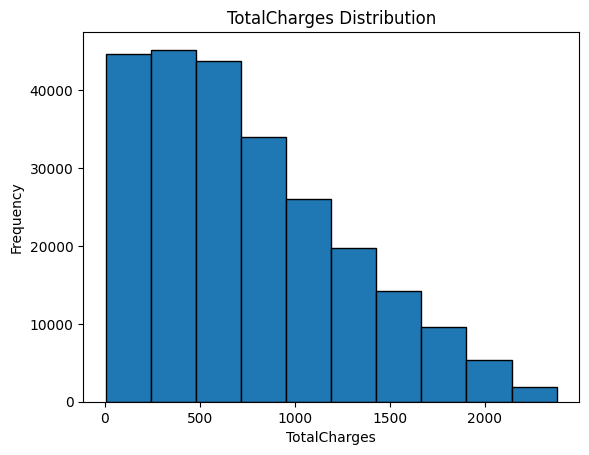

In [18]:
# Histogram - TotalCharges
plt.hist(sub_data1["TotalCharges"], bins=10, edgecolor="black")
plt.title("TotalCharges Distribution")
plt.xlabel("TotalCharges")
plt.ylabel("Frequency")
plt.show()

In [19]:
# Get the median for the TotalCharges column

sub_data1["TotalCharges"].median()

# mean = 750.507661
# median = 649.72820255

np.float64(649.72820255)

In [20]:
# ContentDownloadsPerMonth
print("Skewness:", sub_data1["ContentDownloadsPerMonth"].skew())

# Skewness: 0.0000345 = symmetrical - use the mean for imputation

Skewness: 3.452670004886015e-05


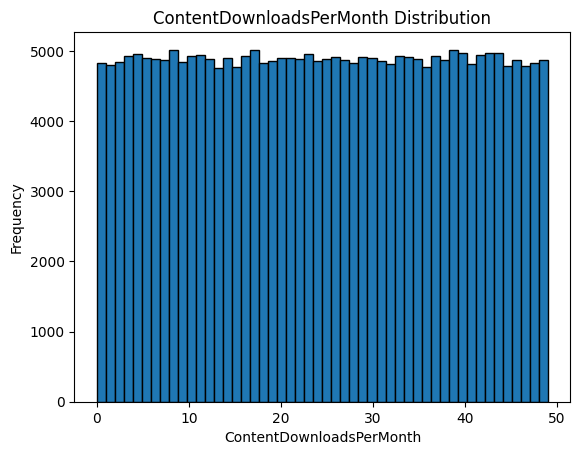

In [21]:
# Histogram
plt.hist(sub_data1["ContentDownloadsPerMonth"], bins=50, edgecolor="black")
plt.title("ContentDownloadsPerMonth Distribution")
plt.xlabel("ContentDownloadsPerMonth")
plt.ylabel("Frequency")
plt.show()

In [22]:
print("Skewness:", sub_data1["WatchlistSize"].skew())

Skewness: -0.004185038406949237


In [23]:
# Impute missing numerical values with the mean, but use the median for the 'TotalCharges' column.

In [24]:
# Fill missing values with mean/average, median

# AccountAge, MonthlyCharges, TotalCharges
sub_data1 = sub_data1.copy()
sub_data1["AccountAge"] = sub_data1["AccountAge"].fillna(sub_data1["AccountAge"].mean())
sub_data1["MonthlyCharges"] = sub_data1["MonthlyCharges"].fillna(sub_data1["MonthlyCharges"].mean())
sub_data1["MonthlyCharges"] = sub_data1["MonthlyCharges"].fillna(sub_data1["MonthlyCharges"].mean())
sub_data1["TotalCharges"] = sub_data1["TotalCharges"].fillna(sub_data1["TotalCharges"].median())


# ViewingHoursPerWeek, AverageViewingDuration, ContentDownloadsPerMonth
sub_data1["ViewingHoursPerWeek"] = sub_data1["ViewingHoursPerWeek"].fillna(sub_data1["ViewingHoursPerWeek"].mean())
sub_data1["AverageViewingDuration"] = sub_data1["AverageViewingDuration"].fillna(sub_data1["AverageViewingDuration"].mean())
sub_data1["ContentDownloadsPerMonth"] = sub_data1["ContentDownloadsPerMonth"].fillna(sub_data1["ContentDownloadsPerMonth"].mean())

# UserRating, SupportTicketsPerMonth, WatchlistSize
sub_data1["UserRating"] = sub_data1["UserRating"].fillna(sub_data1["UserRating"].mean())
sub_data1["SupportTicketsPerMonth"] = sub_data1["SupportTicketsPerMonth"].fillna(sub_data1["SupportTicketsPerMonth"].mean())
sub_data1["WatchlistSize"] = sub_data1["WatchlistSize"].fillna(sub_data1["WatchlistSize"].mean())

In [25]:
# Checking the difference of total missing values/ NaN
sub_data1.isna().sum()

AccountAge                     0
MonthlyCharges                 0
TotalCharges                   0
SubscriptionType            2459
PaymentMethod               2562
PaperlessBilling            2438
ContentType                 2482
MultiDeviceAccess           2461
DeviceRegistered            2524
ViewingHoursPerWeek            0
AverageViewingDuration         0
ContentDownloadsPerMonth       0
GenrePreference             2475
UserRating                     0
SupportTicketsPerMonth         0
Gender                      2429
WatchlistSize                  0
ParentalControl             2507
SubtitlesEnabled            2529
CustomerID                  2499
Churn                       2545
dtype: int64

In [26]:
# Inconsistent text in 'GenrePreference' and 'Gender' columns

distinct_genpref = sub_data1["GenrePreference"].unique()
print(distinct_genpref)

distinct_gender = sub_data1["Gender"].unique()
print(distinct_gender)

['Sci-Fi' 'Action' 'Fantasy' 'Drama' 'Comedy' 'com edy' 'Drama ' nan
 'Actn.' 'drmaa' ' action' 'comedy,']
['Male' 'Female' nan 'female' 'M' 'Female.' 'F' ' Male' 'FEMALE' 'male'
 'fem ale' 'MALE']


In [27]:
distinct_genpref

array(['Sci-Fi', 'Action', 'Fantasy', 'Drama', 'Comedy', 'com edy',
       'Drama ', nan, 'Actn.', 'drmaa', ' action', 'comedy,'],
      dtype=object)

In [28]:
sub_data1["GenrePreference"] = sub_data1["GenrePreference"].str.strip()

genre_mapping = {
    "com edy": "Comedy",
    "comedy,": "Comedy",
    "Drama ": "Drama",
    "drmaa": "Drama",
    "action": "Action",
    "Actn.": "Action"
}

sub_data1["GenrePreference"] = sub_data1["GenrePreference"].replace(genre_mapping)

In [29]:
sub_data1["GenrePreference"].unique()

array(['Sci-Fi', 'Action', 'Fantasy', 'Drama', 'Comedy', nan],
      dtype=object)

In [30]:
distinct_gender

array(['Male', 'Female', nan, 'female', 'M', 'Female.', 'F', ' Male',
       'FEMALE', 'male', 'fem ale', 'MALE'], dtype=object)

In [31]:
sub_data1["Gender"] = sub_data1["Gender"].str.strip()

gender_mapping = {
    "female": "Female",
    "Female.": "Female",
    "F": "Female",
    "FEMALE": "Female",
    "fem ale": "Female",
    "M": "Male",
    " Male": "Male",
    "male": "Male",
    "MALE": "Male",
}

sub_data1["Gender"] = sub_data1["Gender"].replace(gender_mapping)

In [32]:
sub_data1["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [33]:
sub_data1.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20.0,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,24.497813,Sci-Fi,2.176498,4.0,Male,3.0,No,No,CB6SXPNVZA,0.0
1,57.0,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18.000000,Action,3.478632,8.0,Male,23.0,No,Yes,S7R2G87O09,0.0
2,73.0,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23.000000,Fantasy,4.238824,6.0,Male,1.0,Yes,Yes,EASDC20BDT,0.0
3,32.0,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30.000000,Drama,4.276013,2.0,Male,24.0,Yes,Yes,NPF69NT69N,0.0
4,57.0,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20.000000,Comedy,3.616170,4.0,Female,0.0,No,No,4LGYPK7VOL,0.0


In [34]:
sub_data1["SubscriptionType"].unique()

array(['Premium', 'Basic', 'Standard', nan], dtype=object)

In [35]:
# Export clean DataFrame(sub_data1) to csv 

sub_data1.to_csv("subs_data_clean.csv", index=False)

## III. Exploratory Data Analysis (EDA)

In [95]:
# Import Libraries

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [96]:
subs_eda = pd.read_csv("subs_data_clean.csv") 

In [97]:
subs_eda

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20.000000,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,24.497813,Sci-Fi,2.176498,4.000000,Male,3.0,No,No,CB6SXPNVZA,0.0
1,57.000000,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18.000000,Action,3.478632,8.000000,Male,23.0,No,Yes,S7R2G87O09,0.0
2,73.000000,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23.000000,Fantasy,4.238824,6.000000,Male,1.0,Yes,Yes,EASDC20BDT,0.0
3,32.000000,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30.000000,Drama,4.276013,2.000000,Male,24.0,Yes,Yes,NPF69NT69N,0.0
4,57.000000,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20.000000,Comedy,3.616170,4.000000,Female,0.0,No,No,4LGYPK7VOL,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246810,64.000000,19.042518,1218.721174,Standard,Bank transfer,Yes,TV Shows,NaN,TV,7.558360,...,18.000000,Drama,4.251174,6.000000,Female,21.0,Yes,Yes,0M0ZAUE26G,0.0
246811,60.075894,15.591970,810.782456,Basic,Bank transfer,Yes,Both,Yes,Mobile,26.490931,...,4.000000,Sci-Fi,4.446852,4.000000,Male,11.0,No,Yes,R7EHUEF8TM,0.0
246812,44.000000,6.567748,288.980896,Premium,Credit card,Yes,TV Shows,No,Tablet,20.550039,...,14.000000,Action,2.108250,4.504394,Female,0.0,Yes,Yes,GPTFIKN0DK,0.0
246813,83.000000,18.870990,649.728203,Basic,Mailed check,Yes,Both,No,Tablet,3.260451,...,35.000000,Comedy,2.918739,1.000000,Male,13.0,Yes,Yes,2M1RUFXJ7Q,0.0


In [98]:
print("\nNumeric Summary:\n", subs_eda.describe())
print("\nCategorical Counts:\n", subs_eda.select_dtypes('object').nunique())


Numeric Summary:
           AccountAge  MonthlyCharges   TotalCharges  ViewingHoursPerWeek  \
count  246815.000000   246815.000000  246815.000000        246815.000000   
mean       60.075894       12.490879     749.645214            20.500760   
std        34.112244        4.306452     520.540495            11.186584   
min         1.000000        4.990062       4.991154             1.000065   
25%        31.000000        8.776253     332.130855            10.865668   
50%        60.075894       12.490879     649.728203            20.500760   
75%        89.000000       16.202916    1083.263548            30.116231   
max       119.000000       19.989957    2378.723844            39.999723   

       AverageViewingDuration  ContentDownloadsPerMonth     UserRating  \
count           246815.000000             246815.000000  246815.000000   
mean                92.272219                 24.497813       3.002692   
std                 50.258532                 14.350090       1.149087   


In [99]:
# T-test - MonthlyCharges by churn status

# Split MonthlyCharges by churn status
churned = subs_eda.loc[subs_eda["Churn"] == 1, "MonthlyCharges"]
not_churned = subs_eda.loc[subs_eda["Churn"] == 0, "MonthlyCharges"]

# Perform independent samples t-test
t_stat, p_value = stats.ttest_ind(churned, not_churned, equal_var=False)  # Welch’s t-test

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("✅ There is a statistically significant difference in MonthlyCharges between churned and non-churned customers.")
else:
    print("❌ There is no statistically significant difference in MonthlyCharges between churned and non-churned customers.")


T-statistic: 49.74452091270447
P-value: 0.0
✅ There is a statistically significant difference in MonthlyCharges between churned and non-churned customers.


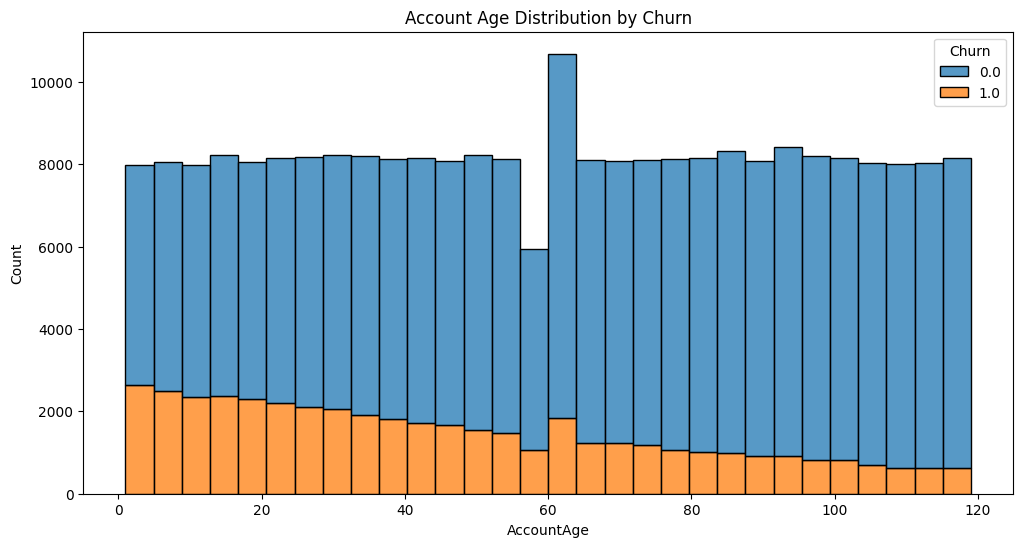

In [157]:
plt.figure(figsize=(12,6))
sns.histplot(subs_eda, x="AccountAge", hue="Churn", multiple="stack", bins=30)
plt.title("Account Age Distribution by Churn")
plt.savefig("churn_accage_distri.png", dpi=300, bbox_inches='tight')
plt.show()

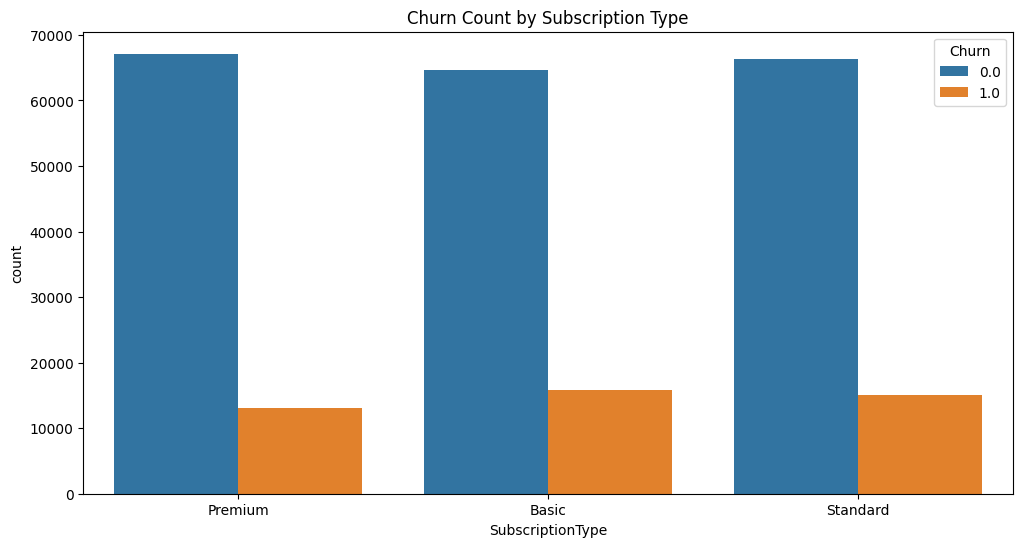

In [155]:
plt.figure(figsize=(12,6))
sns.countplot(data=subs_eda, x="SubscriptionType", hue="Churn")
plt.title("Churn Count by Subscription Type")
plt.savefig("churn_substype.png", dpi=300, bbox_inches='tight')
plt.show()

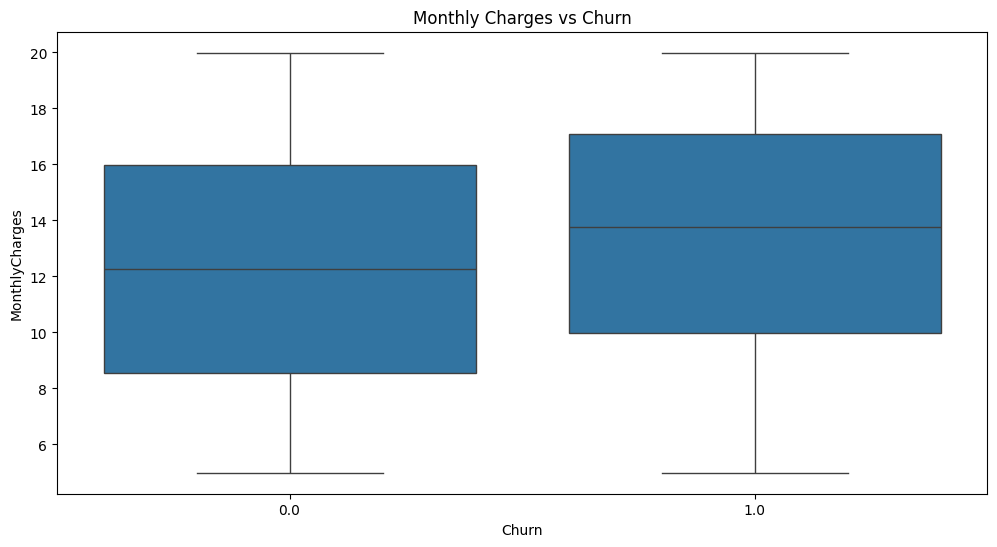

In [156]:
plt.figure(figsize=(12,6))
sns.boxplot(data=subs_eda, x="Churn", y="MonthlyCharges")
plt.title("Monthly Charges vs Churn")
plt.savefig("churn_monthlycharges.png", dpi=300, bbox_inches='tight')
plt.show()

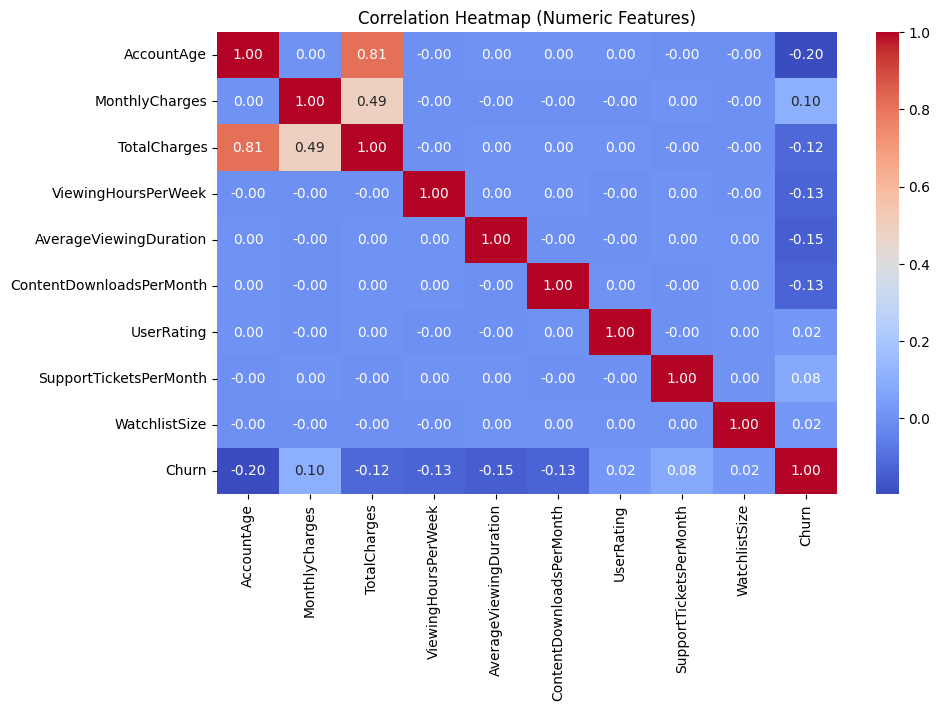

In [158]:
plt.figure(figsize=(10,6))
sns.heatmap(subs_eda.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.savefig("churn_corrheatmap.png", dpi=300, bbox_inches='tight')
plt.show()

### Initial Insight: EDA with Visual 

1. **Churn Count by Subscription** - Premium user(13,044) are less likely to churn than Basic(15,804) and Standard users(14,997).
2. **Monthly Charges vs Churn** - Churned customers generally pay slightly higher monthly charges (See box plot).
3. **Account Age Distribution by Churn** - Higher churn in early months (0–20 months)
4. **Correlation Heatmap** (Numeric Features) - The churn correlations are weak (absolute values < 0.20), meaning churn is multi-factorial rather than driven by one numeric feature alone. No strong single predictor of churn.

## IV. Segmentation & Analysis

In [104]:
# Churn count by Subscription Type

customer_type_churn_count = (
    subs_eda[subs_eda["Churn"] == 1]
    .groupby("SubscriptionType")["Churn"]
    .count()
    .reset_index(name="ChurnCount")
)
print(customer_type_churn_count)

  SubscriptionType  ChurnCount
0            Basic       15804
1          Premium       13044
2         Standard       14997


In [105]:
# Churn rates by Subscription Type

# Group by SubscriptionType and calculate churn metrics
churn_stats = (
    subs_eda.groupby("SubscriptionType")
    .agg(
        churn_count=("Churn", lambda x: (x == 1).sum()),   # count churned
        total_customers=("Churn", "count")                 # total per type
    )
    .reset_index()
)

# Add churn rate column
churn_stats["churn_rate"] = churn_stats["churn_count"] / churn_stats["total_customers"]

print(churn_stats)


# Premium user (16% churn rate) are less likely to churn than Basic (20%) and Standard users (18%) (See bar chart)

  SubscriptionType  churn_count  total_customers  churn_rate
0            Basic        15804            80403    0.196560
1          Premium        13044            80172    0.162700
2         Standard        14997            81257    0.184563


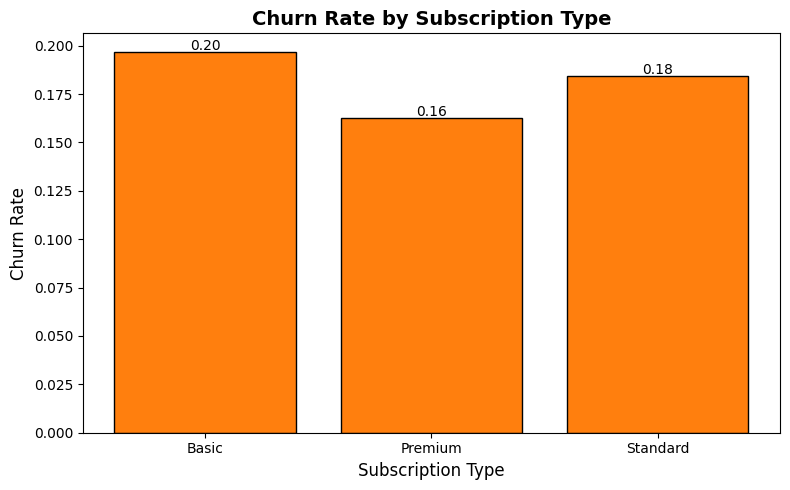

In [167]:
# Plot churn rate by Subscription Type
plt.figure(figsize=(8, 5))
plt.bar(churn_stats["SubscriptionType"], churn_stats["churn_rate"], 
        color="C1", edgecolor="black")

# Titles and labels
plt.title("Churn Rate by Subscription Type", fontsize=14, weight="bold")
plt.xlabel("Subscription Type", fontsize=12)
plt.ylabel("Churn Rate", fontsize=12)

# Annotate churn rate values above bars
for idx, val in enumerate(churn_stats["churn_rate"]):
    plt.text(idx, val + 0.001, f"{val:.2f}", ha="center", fontsize=10)

plt.tight_layout()
plt.savefig("churnrate_substype_chart.png", dpi=300, bbox_inches='tight')
plt.show()

In [107]:
subs_eda["AccountAge"].describe()

count    246815.000000
mean         60.075894
std          34.112244
min           1.000000
25%          31.000000
50%          60.075894
75%          89.000000
max         119.000000
Name: AccountAge, dtype: float64

In [108]:
# Churn rates by tenure (Account Age)

# Create tenure_segment column
subs_eda["tenure_segment"] = pd.cut(
    subs_eda["AccountAge"],
    bins=[-1, 5, 11, 35, 60, np.inf],
    labels=["New_Subscriber", "<1Year", "1-3Years", "3-5Years", "5+Years"]
)

# Aggregate churn stats
churn_summary = (
    subs_eda.groupby("tenure_segment", observed=False)
    .agg(
        total_customers=("CustomerID", "count"),
        churn_count=("Churn", "sum")
    )
    .assign(churn_rate=lambda x: round(x["churn_count"] / x["total_customers"], 2))
    .reset_index()
)

print(churn_summary)

   tenure_segment  total_customers  churn_count  churn_rate
0  New_Subscriber             9942       3266.0        0.33
1          <1Year            11992       3648.0        0.30
2        1-3Years            49042      13038.0        0.27
3        3-5Years            50765      10102.0        0.20
4         5+Years           122575      14233.0        0.12


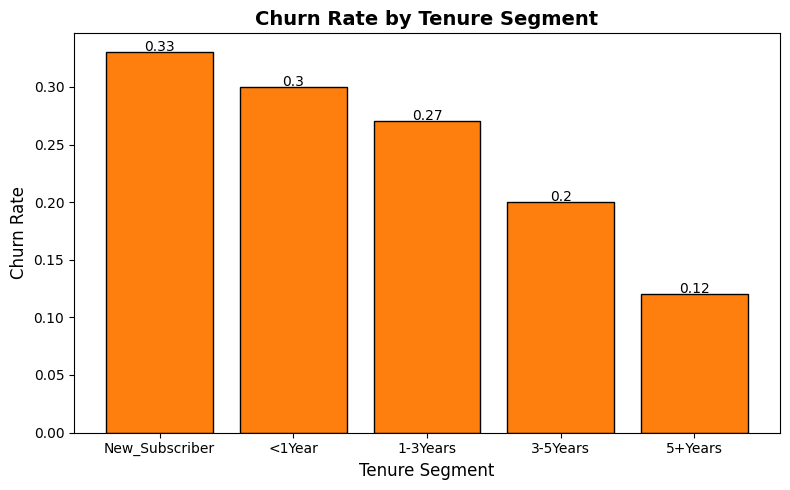

In [168]:
# Plot churn rate by Tenure Segment
plt.figure(figsize=(8, 5))
plt.bar(churn_summary["tenure_segment"], churn_summary["churn_rate"], color="C1", edgecolor="black")

# Add titles and labels
plt.title("Churn Rate by Tenure Segment", fontsize=14, weight="bold")
plt.xlabel("Tenure Segment", fontsize=12)
plt.ylabel("Churn Rate", fontsize=12)

# Add churn rate values on top of bars
for idx, val in enumerate(churn_summary["churn_rate"]):
    plt.text(idx, val + 0.001, str(val), ha="center", fontsize=10)

plt.tight_layout()
plt.savefig("churnrate_tenure_chart.png", dpi=300, bbox_inches='tight')
plt.show()

In [110]:
churn_count = (subs_eda["Churn"]==1).sum()
nonchurn_count = (subs_eda["Churn"]==0).sum()
print("Churn count:", churn_count)
print("Nonchurn_count:", nonchurn_count) 

Churn count: 44287
Nonchurn_count: 199983


In [111]:
churn_rate = subs_eda["Churn"].mean()
print(f"\nOverall churn rate: {churn_rate:.2%}")


Overall churn rate: 18.13%


In [112]:
# Churn rates by Usage

# Group by DeviceRegistered and calculate churn metrics
churn_stats_usage = (
    subs_eda.groupby("DeviceRegistered")
    .agg(
        churn_count=("Churn", lambda x: (x == 1).sum()),   # count churned
        total_customers=("Churn", "count")                 # total per type
    )
    .reset_index()
)

# Add churn rate column
churn_stats_usage["churn_rate"] = churn_stats_usage["churn_count"] / churn_stats_usage["total_customers"]

print(churn_stats_usage)

  DeviceRegistered  churn_count  total_customers  churn_rate
0         Computer        10978            60598    0.181161
1           Mobile        11035            60424    0.182626
2               TV        10762            60089    0.179101
3           Tablet        11068            60663    0.182451


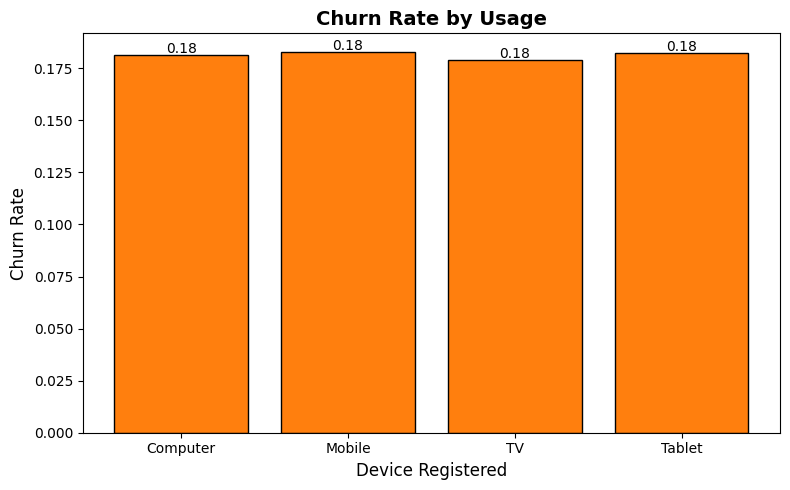

In [169]:
# Plot churn rate by Usage Type
plt.figure(figsize=(8, 5))
plt.bar(churn_stats_usage["DeviceRegistered"], churn_stats_usage["churn_rate"], 
        color="C1", edgecolor="black")

# Titles and labels
plt.title("Churn Rate by Usage", fontsize=14, weight="bold")
plt.xlabel("Device Registered", fontsize=12)
plt.ylabel("Churn Rate", fontsize=12)

# Annotate churn rate values above bars
for idx, val in enumerate(churn_stats_usage["churn_rate"]):
    plt.text(idx, val + 0.001, f"{val:.2f}", ha="center", fontsize=10)

plt.tight_layout()
plt.show()

In [114]:
# Churn revenue loss by Subscription Type

customer_type_revenue_loss = (
    subs_eda[subs_eda["Churn"] == 1]
    .groupby("SubscriptionType")["MonthlyCharges"]
    .sum()
    .reset_index(name="Revenue Loss")
)

# Round Revenue Loss to 2 decimal places
customer_type_revenue_loss["Revenue Loss"] = customer_type_revenue_loss["Revenue Loss"].round(2)

print(customer_type_revenue_loss)

  SubscriptionType  Revenue Loss
0            Basic     211573.31
1          Premium     174782.30
2         Standard     201346.85


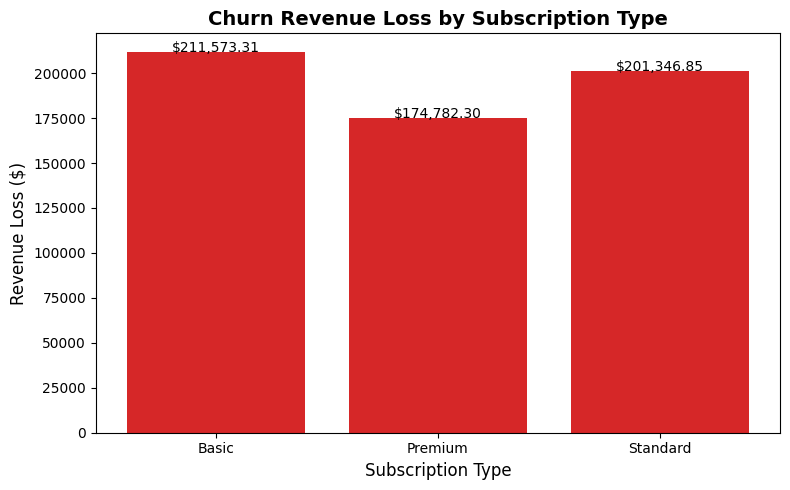

In [171]:
# Plot churn revenue loss by subscription type
plt.figure(figsize=(8, 5))
plt.bar(
    customer_type_revenue_loss["SubscriptionType"],
    customer_type_revenue_loss["Revenue Loss"],
    color="C3"
)

# Add titles and labels
plt.title("Churn Revenue Loss by Subscription Type", fontsize=14, weight="bold")
plt.xlabel("Subscription Type", fontsize=12)
plt.ylabel("Revenue Loss ($)", fontsize=12)

# Add value labels on top of bars
for i, val in enumerate(customer_type_revenue_loss["Revenue Loss"]):
    plt.text(i, val + 5, f"${val:,.2f}", ha="center", fontsize=10)

plt.tight_layout()
plt.savefig("churn_revenueloss_substype.png", dpi=300, bbox_inches='tight')
plt.show()

In [116]:
# Revenue loss from Churn

churned_customers = subs_eda[subs_eda["Churn"] == 1]
revenue_loss = churned_customers["MonthlyCharges"].sum()
print(f"Estimated Monthly Revenue Loss from Churned Customers: ${revenue_loss:,.2f}")

Estimated Monthly Revenue Loss from Churned Customers: $593,472.68


## V. Insights & Business Implications
1. **Key Insights: Churn Segments**
    - New customers (<12 months) have the highest churn rate, suggesting onboarding and early engagement are critical.
    - Subscription Type: Basic-tier customers show higher churn compared to premium, possibly due to lower perceived value.
    - Monthly Charges: Higher monthly charges correlate with increased churn, indicating price sensitivity in some segments.
2. **Churn Drivers**
    - Usage Behavior: Customers with lower viewing hours and fewer content downloads are more likely to churn.
    - Customer Support: Higher support ticket volume is slightly associated with churn, pointing to potential dissatisfaction.
    - Account Age: Longer-tenured customers churn less frequently, indicating loyalty grows over time.
3. **Financial Impact**
    - Estimated revenue at risk from churn is concentrated in higher-paying subscribers.
    - Retaining even a small % of these high-value customers can significantly reduce revenue loss.

## VI. Prediction Model
### Analyzing Customer Behavior to Predict Churn

### i. Preparation for Modeling

In [117]:
import pandas as pd
import numpy as np

In [118]:
subs_data = pd.read_csv("subs_data_clean.csv")
df = subs_data.copy()

In [119]:
df

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20.000000,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,24.497813,Sci-Fi,2.176498,4.000000,Male,3.0,No,No,CB6SXPNVZA,0.0
1,57.000000,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18.000000,Action,3.478632,8.000000,Male,23.0,No,Yes,S7R2G87O09,0.0
2,73.000000,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23.000000,Fantasy,4.238824,6.000000,Male,1.0,Yes,Yes,EASDC20BDT,0.0
3,32.000000,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30.000000,Drama,4.276013,2.000000,Male,24.0,Yes,Yes,NPF69NT69N,0.0
4,57.000000,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20.000000,Comedy,3.616170,4.000000,Female,0.0,No,No,4LGYPK7VOL,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246810,64.000000,19.042518,1218.721174,Standard,Bank transfer,Yes,TV Shows,NaN,TV,7.558360,...,18.000000,Drama,4.251174,6.000000,Female,21.0,Yes,Yes,0M0ZAUE26G,0.0
246811,60.075894,15.591970,810.782456,Basic,Bank transfer,Yes,Both,Yes,Mobile,26.490931,...,4.000000,Sci-Fi,4.446852,4.000000,Male,11.0,No,Yes,R7EHUEF8TM,0.0
246812,44.000000,6.567748,288.980896,Premium,Credit card,Yes,TV Shows,No,Tablet,20.550039,...,14.000000,Action,2.108250,4.504394,Female,0.0,Yes,Yes,GPTFIKN0DK,0.0
246813,83.000000,18.870990,649.728203,Basic,Mailed check,Yes,Both,No,Tablet,3.260451,...,35.000000,Comedy,2.918739,1.000000,Male,13.0,Yes,Yes,2M1RUFXJ7Q,0.0


In [120]:
df.dtypes

AccountAge                  float64
MonthlyCharges              float64
TotalCharges                float64
SubscriptionType             object
PaymentMethod                object
PaperlessBilling             object
ContentType                  object
MultiDeviceAccess            object
DeviceRegistered             object
ViewingHoursPerWeek         float64
AverageViewingDuration      float64
ContentDownloadsPerMonth    float64
GenrePreference              object
UserRating                  float64
SupportTicketsPerMonth      float64
Gender                       object
WatchlistSize               float64
ParentalControl              object
SubtitlesEnabled             object
CustomerID                   object
Churn                       float64
dtype: object

In [121]:
df.nunique()

AccountAge                     120
MonthlyCharges              241469
TotalCharges                241460
SubscriptionType                 3
PaymentMethod                    4
PaperlessBilling                 2
ContentType                      3
MultiDeviceAccess                2
DeviceRegistered                 4
ViewingHoursPerWeek         241388
AverageViewingDuration      241473
ContentDownloadsPerMonth        51
GenrePreference                  5
UserRating                  241451
SupportTicketsPerMonth          11
Gender                           2
WatchlistSize                   26
ParentalControl                  2
SubtitlesEnabled                 2
CustomerID                  241434
Churn                            2
dtype: int64

In [122]:
# Target and CustomerID as column names
custid = "CustomerID"
target = "Churn"

# Categorical = columns with fewer than 10 unique values
categorical = df.nunique()[df.nunique() < 10].keys().tolist()

# Remove target variable from categorical
if target in categorical:
    categorical.remove(target)

# Numerical = all remaining columns
numerical = [col for col in df.columns 
             if col not in [custid, target] + categorical]

In [123]:
categorical

['SubscriptionType',
 'PaymentMethod',
 'PaperlessBilling',
 'ContentType',
 'MultiDeviceAccess',
 'DeviceRegistered',
 'GenrePreference',
 'Gender',
 'ParentalControl',
 'SubtitlesEnabled']

In [124]:
numerical

['AccountAge',
 'MonthlyCharges',
 'TotalCharges',
 'ViewingHoursPerWeek',
 'AverageViewingDuration',
 'ContentDownloadsPerMonth',
 'UserRating',
 'SupportTicketsPerMonth',
 'WatchlistSize']

In [125]:
# One-hot encoding categorical variables

df = pd.get_dummies(data=df, columns=categorical, drop_first=True)

In [126]:
df

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,CustomerID,...,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Male,ParentalControl_Yes,SubtitlesEnabled_Yes
0,20.000000,11.055215,221.104302,36.758104,63.531377,24.497813,2.176498,4.000000,3.0,CB6SXPNVZA,...,True,False,False,False,False,False,True,True,False,False
1,57.000000,5.175208,294.986882,32.450568,25.725595,18.000000,3.478632,8.000000,23.0,S7R2G87O09,...,False,False,True,False,False,False,False,True,False,True
2,73.000000,12.106657,883.785952,7.395160,57.364061,23.000000,4.238824,6.000000,1.0,EASDC20BDT,...,False,False,False,False,False,True,False,True,True,True
3,32.000000,7.263743,232.439774,27.960389,131.537507,30.000000,4.276013,2.000000,24.0,NPF69NT69N,...,False,False,True,False,True,False,False,True,True,True
4,57.000000,16.953078,966.325422,20.083397,45.356653,20.000000,3.616170,4.000000,0.0,4LGYPK7VOL,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246810,64.000000,19.042518,1218.721174,7.558360,172.554880,18.000000,4.251174,6.000000,21.0,0M0ZAUE26G,...,False,True,False,False,True,False,False,False,True,True
246811,60.075894,15.591970,810.782456,26.490931,80.182505,4.000000,4.446852,4.000000,11.0,R7EHUEF8TM,...,True,False,False,False,False,False,True,True,False,True
246812,44.000000,6.567748,288.980896,20.550039,16.722955,14.000000,2.108250,4.504394,0.0,GPTFIKN0DK,...,False,False,True,False,False,False,False,False,True,True
246813,83.000000,18.870990,649.728203,3.260451,57.459276,35.000000,2.918739,1.000000,13.0,2M1RUFXJ7Q,...,False,False,True,True,False,False,False,True,True,True


In [127]:
# Scaling numerical features

# Import StandardScaler library
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler()
scaler = StandardScaler()

# Fit the scaler to numerical columns
scaled_numerical = scaler.fit_transform(df[numerical])
# the result is numpy array

# Build a DataFrame
scaled_numerical = pd.DataFrame(scaled_numerical, columns = numerical)

In [128]:
scaled_numerical

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize
0,-1.174827e+00,-0.333376,-1.015371,1.453292,-0.571861,2.475748e-16,-0.719002,-1.765085e-01,-1.260329
1,-9.016997e-02,-1.698773,-0.873437,1.068229,-1.324089,-4.528073e-01,0.414191,1.223257e+00,1.534766
2,3.788708e-01,-0.089220,0.257696,-1.171549,-0.694573,-1.043767e-01,1.075753,5.233743e-01,-1.539838
3,-8.230461e-01,-1.213794,-0.993595,0.666838,0.781268,3.834261e-01,1.108118,-8.763913e-01,1.674521
4,-9.016997e-02,1.036168,0.416261,-0.037309,-0.933487,-3.134351e-01,0.533884,-1.765085e-01,-1.679593
...,...,...,...,...,...,...,...,...,...
246810,1.150354e-01,1.521357,0.901134,-1.156960,1.597397,-4.528073e-01,1.086501,5.233743e-01,1.255257
246811,2.082959e-16,0.720105,0.117450,0.535479,-0.240551,-1.428413e+00,1.256791,-1.765085e-01,-0.142291
246812,-4.712656e-01,-1.375411,-0.884975,0.004405,-1.503216,-7.315518e-01,-0.778395,3.108104e-16,-1.679593
246813,6.720212e-01,1.481527,-0.191949,-1.541162,-0.692679,7.318566e-01,-0.073060,-1.226333e+00,0.137219


In [129]:
# Bringing it all together

# Keep a copy of non-numerical columns (ID, target, categorical)
df_non_num = df.drop(columns=numerical, axis=1)

# Merge the non-numerical with the scaled numerical data
df_merge = df_non_num.merge(
    right=scaled_numerical,
    how="left",
    left_index=True,
    right_index=True
)

In [130]:
df_merge

,CustomerID,Churn,SubscriptionType_Premium,SubscriptionType_Standard,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaperlessBilling_Yes,ContentType_Movies,ContentType_TV Shows,...,SubtitlesEnabled_Yes,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize
0,CB6SXPNVZA,0.0,True,False,False,False,True,False,False,False,...,False,-1.174827e+00,-0.333376,-1.015371,1.453292,-0.571861,2.475748e-16,-0.719002,-1.765085e-01,-1.260329
1,S7R2G87O09,0.0,False,False,True,False,False,True,True,False,...,True,-9.016997e-02,-1.698773,-0.873437,1.068229,-1.324089,-4.528073e-01,0.414191,1.223257e+00,1.534766
2,EASDC20BDT,0.0,False,False,False,False,True,True,True,False,...,True,3.788708e-01,-0.089220,0.257696,-1.171549,-0.694573,-1.043767e-01,1.075753,5.233743e-01,-1.539838
3,NPF69NT69N,0.0,False,False,False,True,False,False,False,True,...,True,-8.230461e-01,-1.213794,-0.993595,0.666838,0.781268,3.834261e-01,1.108118,-8.763913e-01,1.674521
4,4LGYPK7VOL,0.0,True,False,False,True,False,True,False,True,...,False,-9.016997e-02,1.036168,0.416261,-0.037309,-0.933487,-3.134351e-01,0.533884,-1.765085e-01,-1.679593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246810,0M0ZAUE26G,0.0,False,True,False,False,False,True,False,True,...,True,1.150354e-01,1.521357,0.901134,-1.156960,1.597397,-4.528073e-01,1.086501,5.233743e-01,1.255257
246811,R7EHUEF8TM,0.0,False,False,False,False,False,True,False,False,...,True,2.082959e-16,0.720105,0.117450,0.535479,-0.240551,-1.428413e+00,1.256791,-1.765085e-01,-0.142291
246812,GPTFIKN0DK,0.0,True,False,True,False,False,True,False,True,...,True,-4.712656e-01,-1.375411,-0.884975,0.004405,-1.503216,-7.315518e-01,-0.778395,3.108104e-16,-1.679593
246813,2M1RUFXJ7Q,0.0,False,False,False,False,True,True,False,False,...,True,6.720212e-01,1.481527,-0.191949,-1.541162,-0.692679,7.318566e-01,-0.073060,-1.226333e+00,0.137219


In [131]:
# Export to csv file

df_merge.to_csv("df_merge.csv", index=False)

### ii. ML Modeling (Logistic Regression)

In [132]:
# import libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

In [133]:
subs_data = pd.read_csv("df_merge.csv")
subs1= subs_data.copy()

In [134]:
subs1

,CustomerID,Churn,SubscriptionType_Premium,SubscriptionType_Standard,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaperlessBilling_Yes,ContentType_Movies,ContentType_TV Shows,...,SubtitlesEnabled_Yes,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize
0,CB6SXPNVZA,0.0,True,False,False,False,True,False,False,False,...,False,-1.174827e+00,-0.333376,-1.015371,1.453292,-0.571861,2.475748e-16,-0.719002,-1.765085e-01,-1.260329
1,S7R2G87O09,0.0,False,False,True,False,False,True,True,False,...,True,-9.016997e-02,-1.698773,-0.873437,1.068229,-1.324089,-4.528073e-01,0.414191,1.223257e+00,1.534766
2,EASDC20BDT,0.0,False,False,False,False,True,True,True,False,...,True,3.788708e-01,-0.089220,0.257696,-1.171549,-0.694573,-1.043767e-01,1.075753,5.233743e-01,-1.539838
3,NPF69NT69N,0.0,False,False,False,True,False,False,False,True,...,True,-8.230461e-01,-1.213794,-0.993595,0.666838,0.781268,3.834261e-01,1.108118,-8.763913e-01,1.674521
4,4LGYPK7VOL,0.0,True,False,False,True,False,True,False,True,...,False,-9.016997e-02,1.036168,0.416261,-0.037309,-0.933487,-3.134351e-01,0.533884,-1.765085e-01,-1.679593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246810,0M0ZAUE26G,0.0,False,True,False,False,False,True,False,True,...,True,1.150354e-01,1.521357,0.901134,-1.156960,1.597397,-4.528073e-01,1.086501,5.233743e-01,1.255257
246811,R7EHUEF8TM,0.0,False,False,False,False,False,True,False,False,...,True,2.082959e-16,0.720105,0.117450,0.535479,-0.240551,-1.428413e+00,1.256791,-1.765085e-01,-0.142291
246812,GPTFIKN0DK,0.0,True,False,True,False,False,True,False,True,...,True,-4.712656e-01,-1.375411,-0.884975,0.004405,-1.503216,-7.315518e-01,-0.778395,3.108104e-16,-1.679593
246813,2M1RUFXJ7Q,0.0,False,False,False,False,True,True,False,False,...,True,6.720212e-01,1.481527,-0.191949,-1.541162,-0.692679,7.318566e-01,-0.073060,-1.226333e+00,0.137219


In [135]:
# Calculate the ratio size of each churn group
subs1.groupby(['Churn']).size() / subs1.shape[0] * 100

Churn
0.0    81.025464
1.0    17.943399
dtype: float64

In [136]:
# Split the data into train and test
train, test = train_test_split(subs1, test_size = .25)

In [137]:
train

,CustomerID,Churn,SubscriptionType_Premium,SubscriptionType_Standard,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaperlessBilling_Yes,ContentType_Movies,ContentType_TV Shows,...,SubtitlesEnabled_Yes,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize
46761,E696EC6K7V,1.0,False,False,False,False,True,False,False,True,...,False,1.229007,1.094966,1.931450,-0.346935,0.864363,-1.498099,-1.140789,1.573199,0.556483
234451,9EXG4LYT4Q,0.0,False,False,False,False,False,False,False,False,...,True,-0.852361,1.268965,-0.370810,0.739156,0.873894,0.313740,1.450924,1.573199,-1.120574
208942,EYRVNGY9MT,0.0,True,False,True,False,False,False,False,False,...,True,-0.002225,-1.704621,-0.846513,1.090140,1.050137,1.359032,1.589200,-1.576274,0.137219
87366,T7T8I34FD4,1.0,False,True,False,False,False,False,False,True,...,True,1.698048,0.188535,1.575452,-1.160614,0.227722,-1.637471,0.130101,1.573199,0.000000
134245,8GDFE372CI,0.0,True,False,False,False,True,True,False,True,...,True,1.375582,0.694506,1.742231,0.578434,0.077717,0.313740,0.190260,-1.226333,1.674521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184695,KEI1BZECVO,0.0,False,True,False,False,False,False,False,True,...,True,0.642706,1.156251,1.311931,-0.497876,-0.838455,1.359032,0.704124,1.223257,1.255257
159941,6EQ7I63ZJQ,0.0,True,False,False,True,False,True,True,False,...,False,-0.148800,-1.281401,-0.703409,1.416984,0.289387,-0.174063,-1.558507,-0.176508,-0.841065
233832,NNNMAMKHJZ,0.0,False,False,True,False,False,True,False,True,...,False,-1.731813,1.162089,-1.406521,-0.117970,0.311552,0.662171,-0.671451,0.873316,-0.421800
241449,8CY2513O7L,0.0,True,False,False,False,False,False,False,False,...,True,-0.910991,0.232918,-0.688365,1.697574,0.052432,0.522798,1.502725,-0.176508,0.416728


In [138]:
test

,CustomerID,Churn,SubscriptionType_Premium,SubscriptionType_Standard,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaperlessBilling_Yes,ContentType_Movies,ContentType_TV Shows,...,SubtitlesEnabled_Yes,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize
77627,BY14M8NTN5,1.0,False,False,False,False,False,True,False,False,...,False,0.613391,0.578500,0.891209,-1.641581,0.626562,-1.289041,1.463943,0.173433,-0.142291
105536,KH4B1UY20B,0.0,False,True,False,True,False,True,True,False,...,False,-1.497292,0.790697,-1.165294,-0.698475,1.635055,-1.358727,-0.798799,1.573199,-0.421800
185284,APST5S4HEU,0.0,True,False,False,False,True,False,False,False,...,True,-0.119485,0.295781,0.040679,1.346912,0.874408,1.080287,1.072776,-0.526450,1.674521
97834,MKD8G68KKG,0.0,False,True,False,True,False,True,False,True,...,False,-1.350717,-0.509911,-1.163246,-0.116202,-1.178404,1.149973,1.351774,-0.176508,-0.841065
173322,DVY0YUMS7X,0.0,False,False,False,False,False,True,False,True,...,True,1.229007,-0.767367,0.359921,0.095019,0.456564,1.289346,-0.246179,-0.526450,-1.260329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56849,Y5807ME2PP,0.0,True,False,False,False,False,False,False,True,...,False,1.404897,-1.660245,-0.331970,-0.982709,1.399067,-0.104377,-0.758495,0.873316,1.395012
46611,NaN,0.0,False,False,False,False,False,False,True,False,...,False,1.580788,1.035279,2.271815,0.653541,0.156185,0.731857,0.255620,0.873316,0.835993
128941,U21WGEJNHF,1.0,False,False,False,False,False,True,False,False,...,False,-1.116197,0.793526,-0.767792,0.086998,-1.536154,-1.219355,-1.677514,0.873316,0.137219
160740,PCC2K9UU51,0.0,False,True,False,True,False,False,True,False,...,True,1.580788,1.049513,2.285240,0.386434,0.444575,1.289346,-0.437275,1.573199,-1.539838


In [139]:
custid = "CustomerID"
target = "Churn"

# Store column names from `subs1` excluding target variable and customer ID
cols = [col for col in subs1.columns if col not in custid + target]

# Extract training features
train_X = train[cols]

# Extract training target
train_Y = train[target]

# Extract testing features
test_X = test[cols]

# Extract testing target
test_Y = test[target]

In [140]:
train_X

,SubscriptionType_Premium,SubscriptionType_Standard,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaperlessBilling_Yes,ContentType_Movies,ContentType_TV Shows,MultiDeviceAccess_Yes,DeviceRegistered_Mobile,...,SubtitlesEnabled_Yes,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize
46761,False,False,False,False,True,False,False,True,True,False,...,False,1.229007,1.094966,1.931450,-0.346935,0.864363,-1.498099,-1.140789,1.573199,0.556483
234451,False,False,False,False,False,False,False,False,False,False,...,True,-0.852361,1.268965,-0.370810,0.739156,0.873894,0.313740,1.450924,1.573199,-1.120574
208942,True,False,True,False,False,False,False,False,False,False,...,True,-0.002225,-1.704621,-0.846513,1.090140,1.050137,1.359032,1.589200,-1.576274,0.137219
87366,False,True,False,False,False,False,False,True,False,True,...,True,1.698048,0.188535,1.575452,-1.160614,0.227722,-1.637471,0.130101,1.573199,0.000000
134245,True,False,False,False,True,True,False,True,False,False,...,True,1.375582,0.694506,1.742231,0.578434,0.077717,0.313740,0.190260,-1.226333,1.674521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184695,False,True,False,False,False,False,False,True,True,True,...,True,0.642706,1.156251,1.311931,-0.497876,-0.838455,1.359032,0.704124,1.223257,1.255257
159941,True,False,False,True,False,True,True,False,False,True,...,False,-0.148800,-1.281401,-0.703409,1.416984,0.289387,-0.174063,-1.558507,-0.176508,-0.841065
233832,False,False,True,False,False,True,False,True,False,False,...,False,-1.731813,1.162089,-1.406521,-0.117970,0.311552,0.662171,-0.671451,0.873316,-0.421800
241449,True,False,False,False,False,False,False,False,False,False,...,True,-0.910991,0.232918,-0.688365,1.697574,0.052432,0.522798,1.502725,-0.176508,0.416728


In [141]:
# Fitting the model

# Import the Logistic Regression classifier

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
logreg = LogisticRegression()

In [142]:
print(train_Y.isnull().sum())

# There are missing values in train_Y

1929


In [143]:
# Drop rows where the target is missing

# Combine X and y to drop consistently
train_data = train_X.copy()
train_data["Churn"] = train_Y

# Drop rows where Churn is NaN
train_data = train_data.dropna(subset=["Churn"])

# Separate again
train_X = train_data.drop(columns=["Churn"])
train_Y = train_data["Churn"]

In [144]:
# Fitting the model again
logreg = LogisticRegression(max_iter=1000, class_weight="balanced")
logreg.fit(train_X, train_Y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [145]:
# Drop rows where target is NaN
train_X = train_X[train_Y.notna()]
train_Y = train_Y.dropna()

test_X = test_X[test_Y.notna()]
test_Y = test_Y.dropna()

# Refit model
logreg.fit(train_X, train_Y)


# Target/s shouldn't have NaN values (Train_Y, Test_Y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [146]:
# Predict churn labels on testing data
pred_test_Y = logreg.predict(test_X)

# Calculate accuracy score on testing data
test_accuracy = accuracy_score(test_Y, pred_test_Y)

# Print test accuracy score rounded to 4 decimals
print('Test accuracy:', round(test_accuracy, 4))

Test accuracy: 0.6772


In [147]:
# Initialize logistic regression instance 
logreg = LogisticRegression(penalty='l1', C=0.025, solver='liblinear')

# Fit the model on training data
logreg.fit(train_X, train_Y)

# Predict churn values on test data
pred_test_Y = logreg.predict(test_X)

# Print the accuracy score on test data
print('Test accuracy:', round(accuracy_score(test_Y, pred_test_Y), 4))

Test accuracy: 0.8248


In [148]:
# Measuring model accuracy

pred_train_Y = logreg.predict(train_X)
pred_test_Y = logreg.predict(test_X)

train_accuracy = accuracy_score(train_Y, pred_train_Y)
test_accuracy = accuracy_score(test_Y, pred_test_Y)

print('Training accuracy:', round(train_accuracy,4))
print('Test accuracy:', round(test_accuracy, 4))

Training accuracy: 0.8237
Test accuracy: 0.8248


In [149]:
# Measuring precision and recall

train_precision = round(precision_score(train_Y, pred_train_Y), 4)
test_precision = round(precision_score(test_Y, pred_test_Y), 4)

train_recall = round(recall_score(train_Y, pred_train_Y), 4)
test_recall = round(recall_score(test_Y, pred_test_Y), 4)

print("Training precision: {}, Training recall: {}".format(train_precision, train_recall))
print("Test precision: {}, Test recall: {}".format(test_precision, test_recall))

Training precision: 0.5793, Training recall: 0.1164
Test precision: 0.5533, Test recall: 0.1106


In [150]:
# Initialize logistic regression instance 
logreg = LogisticRegression(penalty='l1', C=0.025, solver='liblinear')

# Fit the model on training data
logreg.fit(train_X, train_Y)

# Predict churn values on test data
pred_test_Y = logreg.predict(test_X)

# Print the accuracy score on test data
print('Test accuracy:', round(accuracy_score(test_Y, pred_test_Y), 4))

Test accuracy: 0.8248


In [151]:
# Tuning L1 regularization

C = [1, .5, .25, .1, .05, .025, .01, .005, .0025]

l1_metrics = np.zeros((len(C), 5))
l1_metrics[:,0] = C
for index in range(0, len(C)):    
    logreg = LogisticRegression(penalty='l1', C=C[index], solver='liblinear')
    logreg.fit(train_X, train_Y)    
    pred_test_Y = logreg.predict(test_X)    
    l1_metrics[index,1] = np.count_nonzero(logreg.coef_)    
    l1_metrics[index,2] = accuracy_score(test_Y, pred_test_Y)    
    l1_metrics[index,3] = precision_score(test_Y, pred_test_Y)    
    l1_metrics[index,4] = recall_score(test_Y, pred_test_Y)

col_names = ['C','Non-Zero Coeffs','Accuracy','Precision','Recall']
print(pd.DataFrame(l1_metrics, columns=col_names))

        C  Non-Zero Coeffs  Accuracy  Precision    Recall
0  1.0000             27.0  0.824843   0.552410  0.114200
1  0.5000             27.0  0.824826   0.552259  0.114017
2  0.2500             27.0  0.824777   0.551755  0.113559
3  0.1000             26.0  0.824843   0.552925  0.113194
4  0.0500             26.0  0.824745   0.551771  0.112554
5  0.0250             26.0  0.824794   0.553473  0.110725
6  0.0100             21.0  0.825072   0.559450  0.107982
7  0.0050             18.0  0.825007   0.562029  0.102313
8  0.0025             12.0  0.825547   0.577434  0.095456


In [152]:
# Explore the coefficients of the logistic regression to understand what is driving churn to go up or down

# Combine feature names and coefficients into pandas DataFrame
feature_names = pd.DataFrame(train_X.columns, columns = ['Feature'])
log_coef = pd.DataFrame(np.transpose(logreg.coef_), columns = ['Coefficient'])
coefficients = pd.concat([feature_names, log_coef], axis = 1)

# Calculate exponent of the logistic regression coefficients
coefficients['Exp_Coefficient'] = np.exp(coefficients['Coefficient'])

# Remove coefficients that are equal to zero
coefficients = coefficients[coefficients['Coefficient']!=0]

# Print the values sorted by the exponent coefficient
print(coefficients.sort_values(by=['Exp_Coefficient']))

                      Feature  Coefficient  Exp_Coefficient
19                 AccountAge    -0.551611         0.576021
23     AverageViewingDuration    -0.409683         0.663861
24   ContentDownloadsPerMonth    -0.359137         0.698279
22        ViewingHoursPerWeek    -0.355072         0.701123
0    SubscriptionType_Premium    -0.170450         0.843285
2   PaymentMethod_Credit card    -0.127137         0.880613
18       SubtitlesEnabled_Yes    -0.031246         0.969237
6          ContentType_Movies    -0.006891         0.993132
27              WatchlistSize     0.039461         1.040250
25                 UserRating     0.046046         1.047123
26     SupportTicketsPerMonth     0.229034         1.257385
20             MonthlyCharges     0.271108         1.311417


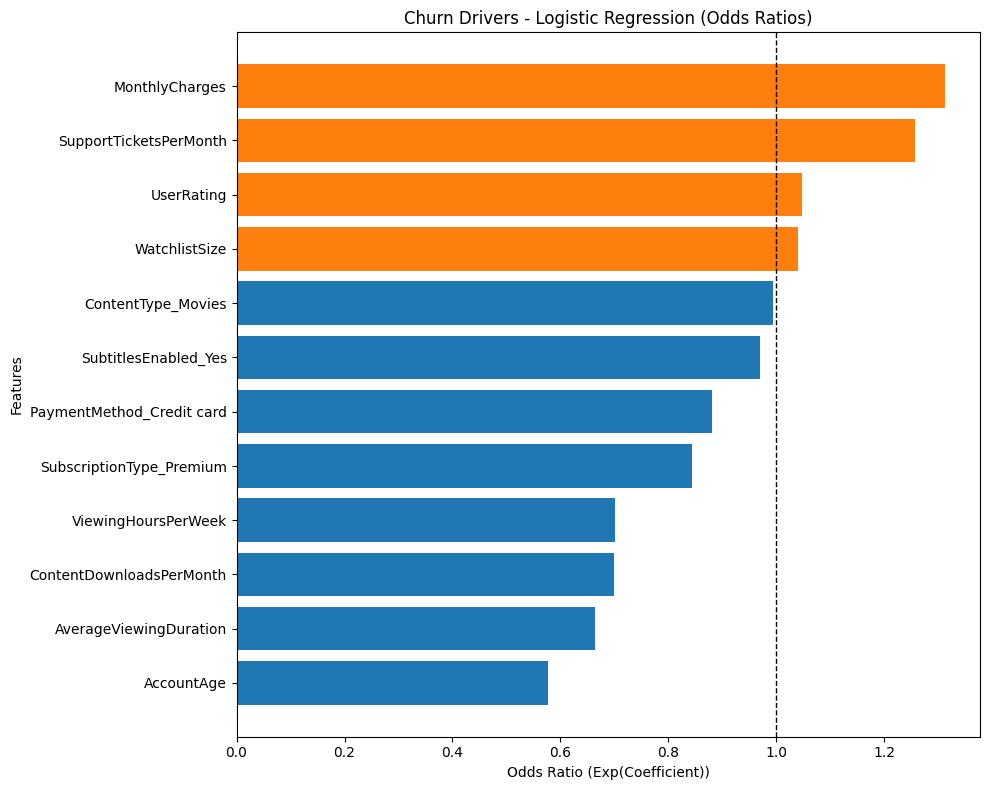

In [166]:
import matplotlib.pyplot as plt

# --- Create coefficients dataframe ---
feature_names = pd.DataFrame(train_X.columns, columns=['Feature'])
log_coef = pd.DataFrame(logreg.coef_.T, columns=['Coefficient'])
coefficients = pd.concat([feature_names, log_coef], axis=1)

# Exponentiate coefficients
coefficients['Exp_Coefficient'] = np.exp(coefficients['Coefficient'])

# Remove 0 coefficients (if any)
coefficients = coefficients[coefficients['Coefficient'] != 0]

# Sort for visualization
coefficients = coefficients.sort_values(by='Exp_Coefficient', ascending=True)

# --- Plot ---
plt.figure(figsize=(10, 8))
colors = coefficients['Coefficient'].apply(lambda x: 'C1' if x > 0 else 'C0')

plt.barh(
    coefficients['Feature'],
    coefficients['Exp_Coefficient'],
    color=colors
)

plt.axvline(x=1, color='black', linestyle='--', linewidth=1)  # baseline odds ratio
plt.xlabel("Odds Ratio (Exp(Coefficient))")
plt.ylabel("Features")
plt.title("Churn Drivers - Logistic Regression (Odds Ratios)")

# Export the plot as png
plt.savefig("odds_ratios.png", dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()



Positive drivers of churn (increase churn risk)

1. Monthly Charges (OR ≈ 1.3) – Customers paying higher monthly fees are more likely to churn. Possibly due to price sensitivity.
2. Support Tickets Per Month (OR ≈ 1.25) – Frequent issues reported = dissatisfaction → higher churn.

## VII. Conclusion & Recommendations

The analysis shows that **customer churn** is concentrated among **short-tenure, Basic-plan, and low-engagement customers**, while **higher-value Premium and Standard customers** contribute most to revenue loss when they leave. **Key churn drivers** include **limited engagement** (low watch time, small watchlists), **poor onboarding experience**, **dissatisfaction reflected in support tickets**, and **weaker perceived value in lower-tier subscriptions**.

To address this, the company should:

- **Strengthen onboarding for new users** – provide guided walkthroughs, early incentives, and personalized recommendations within the first 6–12 months.
- **Boost engagement** – expand watchlist suggestions, highlight trending content, and offer rewards for frequent viewing or downloads.
- **Reduce support friction** – analyze ticket patterns, fix recurring issues, and enhance self-service options to improve satisfaction.
- **Differentiate subscription value** – promote Premium/Standard benefits through free trials or feature previews to reduce Basic-plan churn.
- **Leverage churn prediction models** – proactively flag and intervene with at-risk customers using targeted retention offers.

#### Bottom Line: Reducing churn requires a dual approach: retain more Basic customers through engagement and onboarding, 
#### while protecting revenue by preventing Premium churn. A data-driven retention strategy can lower revenue leakage, improve loyalty, and drive sustainable growth.